# Exploratory Data Analysis and ML Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_null=(df.isna().sum())/891
df_null

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### As we can see that there are lot of null values in Cabin column .So we can drop it .

In [9]:
df.drop("Cabin",axis="columns",inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [12]:
df["Age"].mean()

29.69911764705882

In [13]:
df_median=df["Age"].median()
df_median

28.0

In [14]:
df["Age"].mode()

0    24.0
Name: Age, dtype: float64

### We will fill the null values of the age column with its median because we cant drop the age column 

In [15]:
df["Age"].fillna(df_median,inplace=True)

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So there are no null values in any columns.

In [19]:
df.shape

(889, 11)

In [20]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,C
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,C
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,S


In [21]:
df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

As we need to prepare the dataset for ML model for predicting the survival so some columns dont have any relevance to predict the survival. So lets drop that columns

In [22]:
df.drop(["PassengerId","Name","Ticket","Fare"],axis="columns",inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### Lets plot some charts to get some insights 

### Univariate Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_4044\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<AxesSubplot: xlabel='Age', ylabel='Density'>

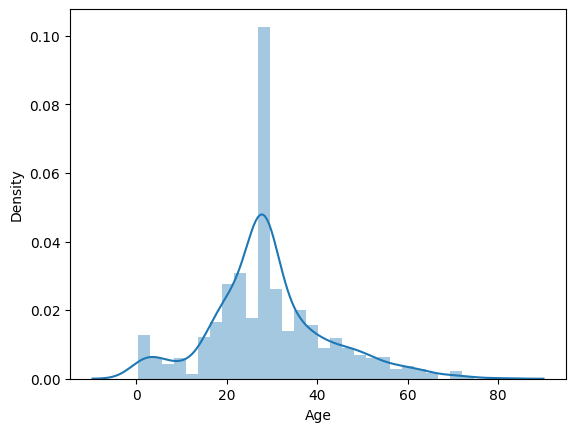

In [24]:
sns.distplot(df.Age)

In [25]:
df["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
df["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
df_copy=df.copy()

In [28]:
num_data={"Sex":{"male":0,"female":1},"Embarked":{"C":0,"S":1,"Q":2}}

In [29]:
df.replace(num_data,inplace=True)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,1
1,1,1,1,38.0,1,0,0
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,1
4,0,3,0,35.0,0,0,1


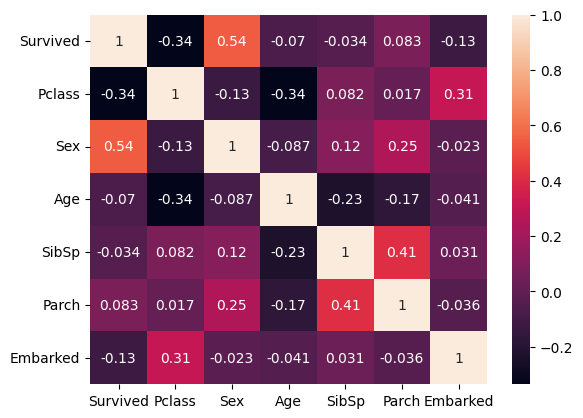

In [31]:
ax = sns.heatmap(df.corr(), annot=True)

### As by the correlation matrix we saw that Parch and Sibsp can be dropped

In [32]:
df.drop(["SibSp","Parch"],axis="columns",inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,1
1,1,1,1,38.0,0
2,1,3,1,26.0,1
3,1,1,1,35.0,1
4,0,3,0,35.0,1


In [34]:
def bar_chart (feature):
    alive = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df2 = pd.DataFrame([alive,dead])
    df2.index=['alive','dead']
    df2.plot(kind = "bar", stacked = True)

In [35]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')

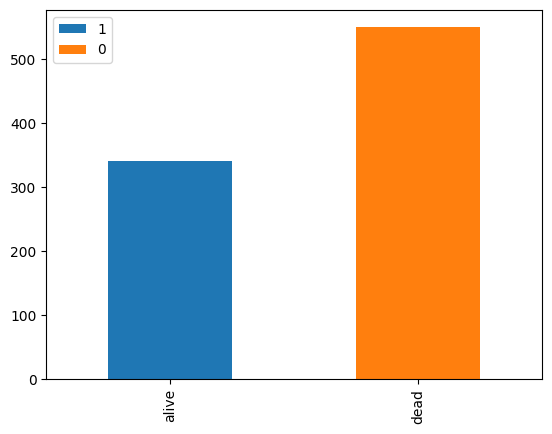

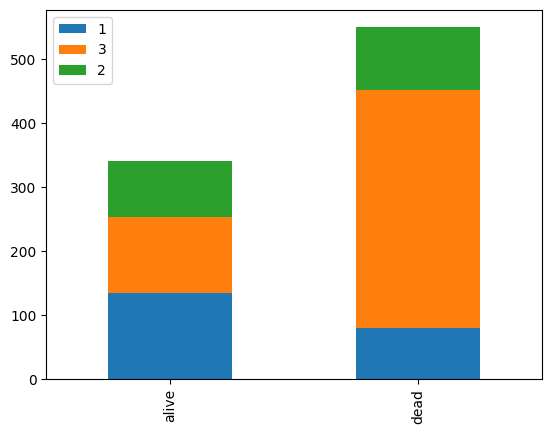

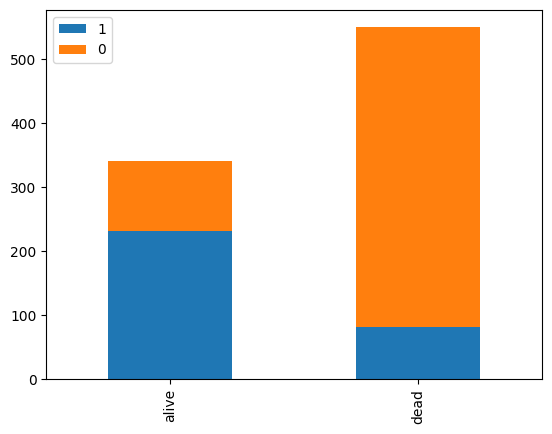

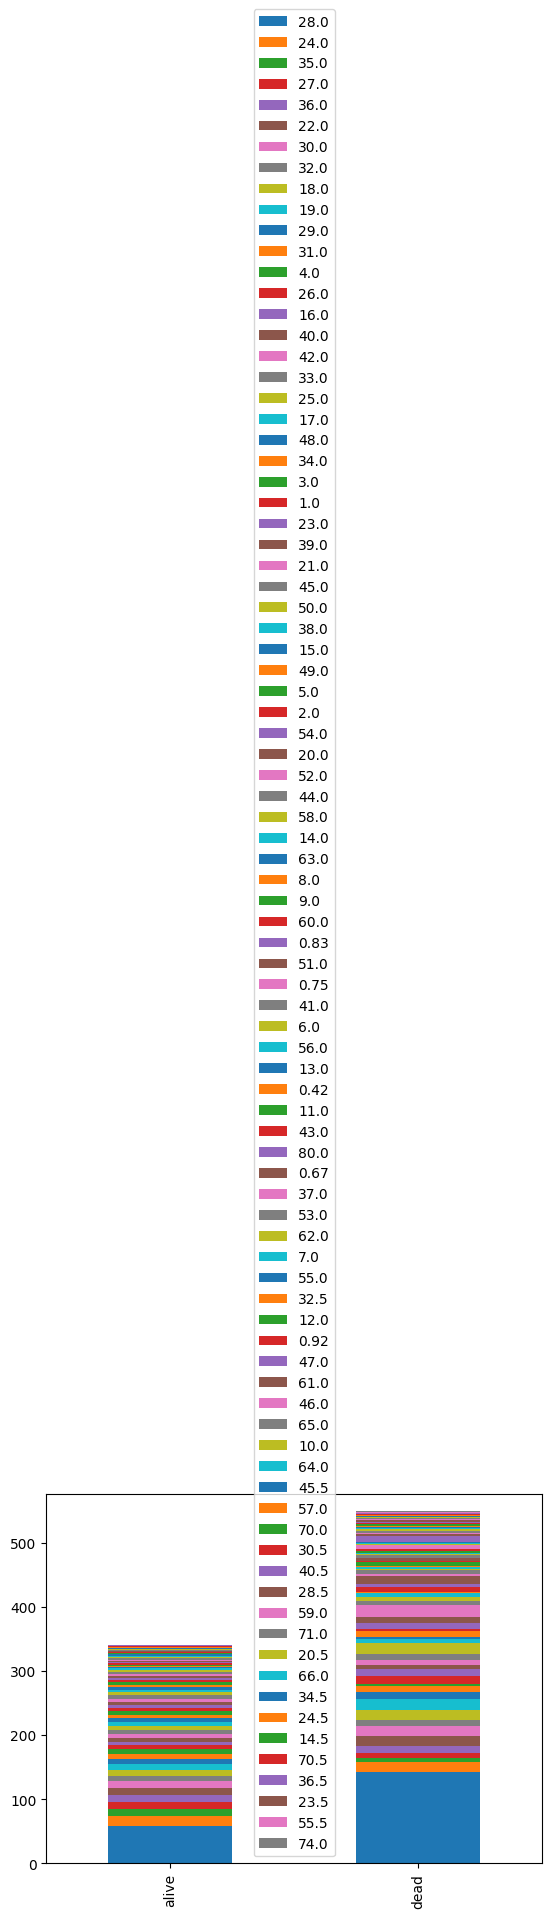

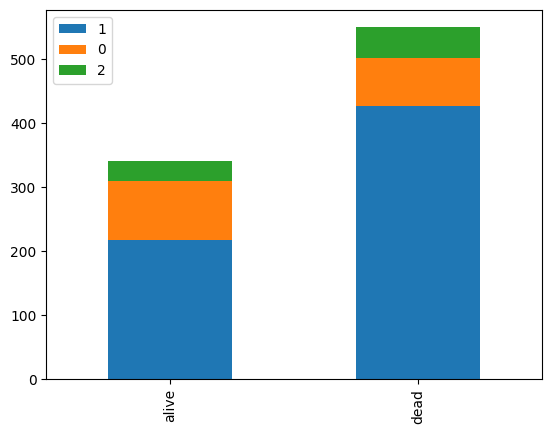

In [36]:
for i in df.columns:
    bar_chart(i)

### One Hot Encoding

In [37]:
dummies=pd.get_dummies(df_copy["Embarked"])

In [38]:
dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [39]:
df_final=pd.concat([df_copy,dummies],axis="columns")

In [40]:
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,C,Q,S
0,0,3,male,22.0,1,0,S,0,0,1
1,1,1,female,38.0,1,0,C,1,0,0
2,1,3,female,26.0,0,0,S,0,0,1
3,1,1,female,35.0,1,0,S,0,0,1
4,0,3,male,35.0,0,0,S,0,0,1


In [41]:
df_final.drop("Embarked",axis="columns",inplace=True)

In [42]:
num__data={"Sex":{"male":0,"female":1}}

In [43]:
df_final.replace(num__data,inplace=True)

In [44]:
df_final.drop("S",axis="columns",inplace=True)

In [45]:
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q
0,0,3,0,22.0,1,0,0,0
1,1,1,1,38.0,1,0,1,0
2,1,3,1,26.0,0,0,0,0
3,1,1,1,35.0,1,0,0,0
4,0,3,0,35.0,0,0,0,0


## As we can see now that our data is cleaned now and ready to train the ML model for predicting the Survival Possibility.

## ML Model

In [46]:
# Importing Libraries

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [47]:
X=df_final.drop("Survived",axis="columns")
y=df.Survived

In [48]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,C,Q
0,3,0,22.0,1,0,0,0
1,1,1,38.0,1,0,1,0
2,3,1,26.0,0,0,0,0
3,1,1,35.0,1,0,0,0
4,3,0,35.0,0,0,0,0


In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
len(X_train)

711

In [91]:
len(X_test)

178

## Logistic Regression

In [92]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [93]:
model_LR.score(X_test,y_test)

0.7808988764044944

## SVM Model

In [94]:
from sklearn.svm import SVC

model_SVM=SVC(kernel="rbf")
model_SVM.fit(X_train,y_train)

SVC()

In [95]:
model_SVM.score(X_test,y_test)

0.6404494382022472

## Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

model_DTR=DecisionTreeClassifier()
model_DTR.fit(X_train,y_train)
model_DTR.score(X_test,y_test)

0.8033707865168539

## KNN Model

In [97]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
model_KNN.score(X_test,y_test)

0.7584269662921348

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

model_RF=RandomForestClassifier()
model_RF.fit(X_train,y_train)
model_RF.score(X_test,y_test)

0.8089887640449438

## Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score

cv_random_forest=cross_val_score(model_RF,X=X,y=y,cv=10)
cv_random_forest

array([0.69662921, 0.82022472, 0.76404494, 0.83146067, 0.84269663,
       0.80898876, 0.82022472, 0.78651685, 0.83146067, 0.85227273])

In [100]:
cv_random_forest.mean()

0.8054519918283963

## Best Model using GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [106]:
model_params={
    "SVM":{
        "model":SVC(gamma="auto"),
        "params":{
            "C":[1,10,20,40],
            "kernel":["rbf","linear"]
        }
    },
    "LogisticRegression":{
        "model":LogisticRegression(solver='liblinear',multi_class='auto'),
        "params":{
            "C":[1,10,20,40]
        }
    },
    "RandomForest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[3,5,10,20]
        }
    },
    "KNN":{
        "model":KNeighborsClassifier(),
        "params":{
            "n_neighbors":[3,6,10]
        }
    }
}

In [107]:
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
    "model":model_name,
    "best_params":clf.best_params_,
    "best_score":clf.best_score_})

scores_df=pd.DataFrame(scores,columns=["model","best_params","best_score"])    

In [108]:
scores_df

,model,best_params,best_score
0,SVM,"{'C': 10, 'kernel': 'rbf'}",0.808766
1,LogisticRegression,{'C': 1},0.803063
2,RandomForest,{'n_estimators': 10},0.805890
3,KNN,{'n_neighbors': 3},0.776332


## Hence the best model for the above dataset is SVM and RandomForest with the given parameters 